In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 设置一个种子则可以使得实验具有重复性
np.random.seed(666)

# 生成100个随机点
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [14]:
# 变成 100行，1列 的格式
X = x.reshape(-1, 1)

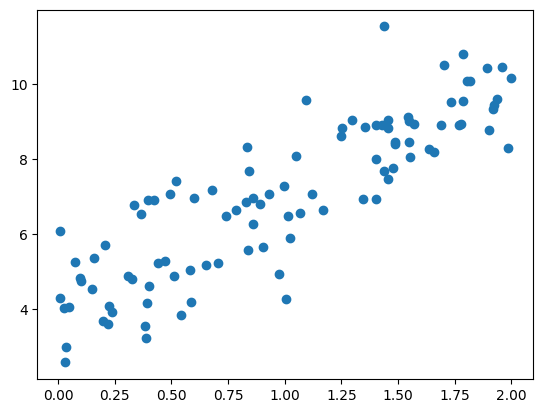

In [15]:
plt.scatter(x, y)
plt.show()

In [16]:
# 损失函数J
# 注意，这里的 theta与X_b 都是矩阵格式
def J(theta, X_b, y):
    # 同时防止计算结果过大
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [39]:
# 对 theta 求导数
# 同理，参数也都是矩阵
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    # res 的值根据公式来
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = np.sum(X_b.dot(theta) - y).dot(X_b[:, i])
    
    return res * 2 / len(X_b)

In [40]:
# 优化梯度下降函数，防止死循环
# n_iters：最多循环次数
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    # 此时已经是高维运算，无法跟踪 theta 取值
    
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        
        i_iter += 1
    
    return theta

In [48]:
X_b = np.hstack([np.ones(()*len(X), 1), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

TypeError: Cannot interpret '1' as a data type